In [1]:
import pandas as pd
import numpy as np
import random as rd


## Part I: one variable

We have a function $x(t)$, that satisfies a stochastic differential equation

$$ \dot{x} = f(x) + \epsilon, $$

where $\epsilon$ is a normal distributed noise (with no correlation at different t).

Here we simulate $x(t)$ using Euler's forward method. Namely, at every t, we compute $\dot{x}(t)$ by $x(t)+\epsilon$, and then move forward in time by 
$$ x(t + \Delta t) \approx x(t) + \dot{x}(t) \cdot \Delta t.$$

In [2]:
## define a function to return the noise

def noise(sigma):
    return rd.gauss(0, sigma)

In [3]:
## define f(x) on the RHS of the differential equation. Let's begin with f(x) = x

def f(x):
    return x

In [4]:
## the main program to simulate x(t)
## initial conditions: t0 = 0, x(t0) = x0

def solver(x0, dt, end_time, sigma):
    
    step_number = int(end_time/dt)
    
    x_array = np.zeros(step_number+1)
    xdot_array = np.zeros(step_number+1)
    t_array = np.zeros(step_number+1)
    
    # initialization    
    x_array[0], xdot_array[0], t_array[0] = x0, f(x0) + noise(sigma), 0
    
    # solver
    for i in range(1,step_number+1):
        t_array[i] = t_array[i-1] + dt
        x_array[i] = x_array[i-1] + xdot_array[i-1]*dt
        xdot_array[i] = f(x_array[i]) + noise(sigma)
    
    # create a data frame
    df = pd.DataFrame(columns=['t','x'])
    df['t'], df['x'] = t_array, x_array
    
    return df

In [9]:
# set x0 = 0, dt = 0.01, end_time = 3, sigma = 1

df = solver(0, 0.01, 3, 1)
df

,t,x
0,0.00,0.000000
1,0.01,0.006438
2,0.02,-0.000635
3,0.03,-0.011939
4,0.04,-0.020045
...,...,...
296,2.96,0.442223
297,2.97,0.448157
298,2.98,0.456654
299,2.99,0.457109


<AxesSubplot:xlabel='t'>

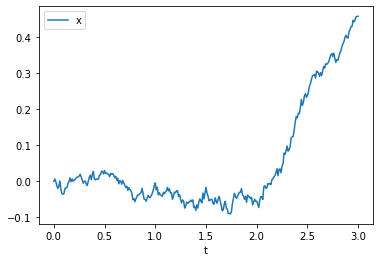

In [10]:
df.plot(x='t',y='x')

 Exercise problem: repeat this simulation 3 times; in the end you should get 3 different x(t). Plot them on the same graph.

## Part II: multiple variables

Now suppose there are $N$ functions, $x_1(t),...,x_N(t)$, and they satisfy the following coupled equations


$$\dot{x}_1(t) = f_1(x_1,...,x_N) + \epsilon_1, $$
$$.$$
$$.$$
$$.$$
$$\dot{x}_N(t) = f_N(x_1,...,x_N) + \epsilon_N $$